# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# **import dataset**

In [2]:
customer = pd.read_csv("/kaggle/input/sales-and-customer-data/customer_data.csv")
sales = pd.read_csv("/kaggle/input/sales-and-customer-data/sales_data.csv")

In [3]:
customer.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


# **DATA CLEANING**

In [6]:
df= customer.merge(sales, on= "customer_id", how= "inner")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
 4   invoice_no      99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [8]:
((df['age'].isnull().sum() / len(df['age'])) * 100).round(2)

0.12

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

customer_id       0
gender            0
age               0
payment_method    0
invoice_no        0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
dtype: int64

In [11]:
df.head()

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05-08-2022,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,09-11-2021,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24-10-2021,Kanyon


In [12]:
df.dtypes

customer_id        object
gender             object
age               float64
payment_method     object
invoice_no         object
category           object
quantity            int64
price             float64
invoice_date       object
shopping_mall      object
dtype: object

In [13]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst= True, utc= False)

In [14]:
df['invoice_date']

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99338, dtype: datetime64[ns]

In [15]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df.select_dtypes(include= "object").nunique()

customer_id       99338
gender                2
payment_method        3
invoice_no        99338
category              8
shopping_mall        10
dtype: int64

In [17]:
df["payment_method"].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [18]:
df["category"].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [19]:
df["shopping_mall"].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [20]:
df.select_dtypes(exclude="object").nunique()

age              52
quantity          5
price            40
invoice_date    797
dtype: int64

In [21]:
df["age"].unique()

array([28., 21., 20., 66., 53., 49., 32., 69., 60., 36., 29., 67., 25.,
       24., 65., 42., 46., 23., 27., 52., 44., 51., 50., 68., 43., 59.,
       54., 48., 40., 41., 19., 18., 22., 61., 45., 64., 33., 63., 34.,
       47., 38., 57., 30., 26., 62., 39., 55., 56., 35., 31., 37., 58.])

In [22]:
df.head()

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,2022-08-05,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,2021-12-12,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,2021-11-09,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,2021-05-16,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,2021-10-24,Kanyon


In [23]:
conc = df.select_dtypes(exclude= "object")

<Axes: >

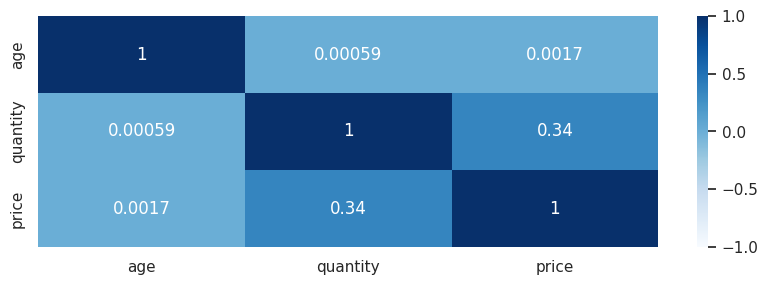

In [24]:
plt.figure(figsize= (10, 3))
sns.heatmap(data= conc.corr(numeric_only= True),vmax= 1 , vmin= -1 , annot= True, cmap= 'Blues')


In [25]:
df['profit'] = df['price'] * df['quantity']

In [26]:
conc = df.select_dtypes(exclude= "object")

<Axes: >

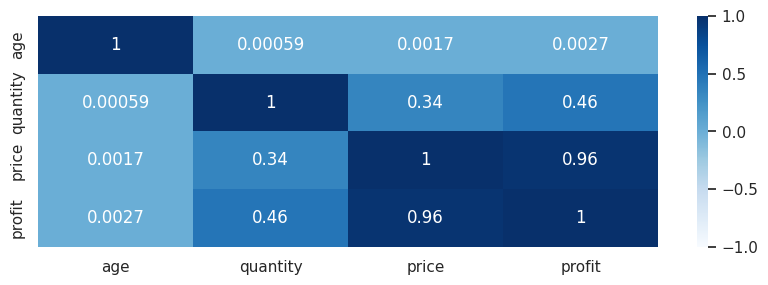

In [27]:
plt.figure(figsize= (10, 3))
sns.heatmap(data= conc.corr(numeric_only= True),vmax= 1 , vmin= -1 , annot= True, cmap= 'Blues')
